In [1]:
import sys
sys.path.insert(0, '../src')

In [2]:
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt

In [3]:
import sklearn
import seaborn as sns

In [4]:
import datetime

In [5]:
data  = pd.read_csv( '../data/rawData/data.csv' )

In [6]:
data[:5]

,id,Gender,Birth_Year,Driving_Exp,Address_Region,Insured_Last_Year,Vehicle_Age,Any_Claim,Engine_Capacity,Sales_Channel,Willingness_to_renew
0,1,Male,1977,7,North,0,1,Yes,2800cc,Website,1
1,2,Male,1974,5,North,0,5,Yes,1000cc,Website,1
2,3,Male,2000,9,East,1,8,No,2600cc,Email,0
3,4,Female,1992,2,North East,1,11,No,2000cc,Email,0
4,5,Female,1997,9,North East,0,11,Yes,1000cc,Email,0


### Checking missing values
No missing values found in current dataset

In [7]:
data.isnull().any()

id                      False
Gender                  False
Birth_Year              False
Driving_Exp             False
Address_Region          False
Insured_Last_Year       False
Vehicle_Age             False
Any_Claim               False
Engine_Capacity         False
Sales_Channel           False
Willingness_to_renew    False
dtype: bool

### Total number of customer

In [8]:
if len(data['id'].unique()) == len(data):
    f'Number of customers in dataset: {len(data)}'

In [9]:
data['capacity_num'] = data['Engine_Capacity'].apply(lambda s: s.replace('cc', ''))

### Customer split by gender

In [10]:
data['Gender'].value_counts().reset_index().rename({'index': 'Gender', 'Gender': 'n_Customers'}, axis=1)

,Gender,n_Customers
0,Male,200810
1,Female,170909


### Customer age distribution

In [11]:
currentYear = datetime.datetime.now().year
data['age'] = data['Birth_Year'].apply(lambda y: currentYear - y)

#### We have more customers in between age range 20-30 and age range 40-50.

<AxesSubplot:xlabel='age', ylabel='Count'>

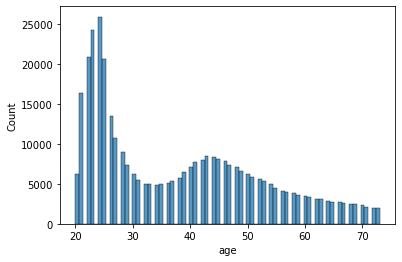

In [12]:
sns.histplot(data=data, x="age")

<AxesSubplot:xlabel='age', ylabel='Count'>

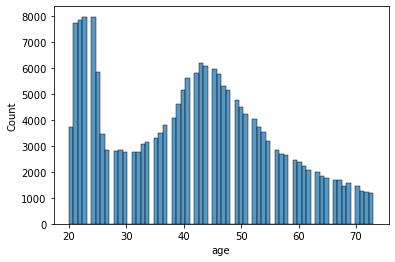

In [13]:
sns.histplot(data=data[ data['Insured_Last_Year']==0 ], x="age")

<AxesSubplot:xlabel='age', ylabel='Count'>

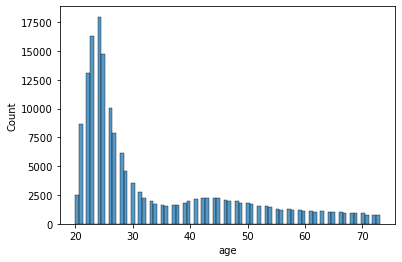

In [14]:
sns.histplot(data=data[ data['Insured_Last_Year']==1 ], x="age")

### In terms of driving experiences, we have almost all customers evenly distributed across different years of experience
However, if we zoom in (truncate the count to minimum 35K), and look more carefully, we can still see differences in distribution

(35000.0, 39619.65)

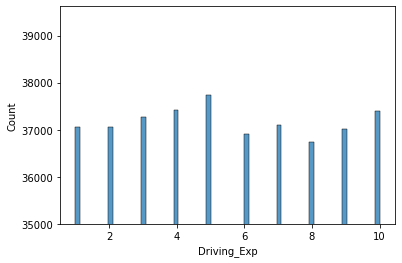

In [15]:
ax = sns.histplot(data=data, x="Driving_Exp")
ax.set_ylim((35000, None))

### In terms of where our customers live, we have more in the North region

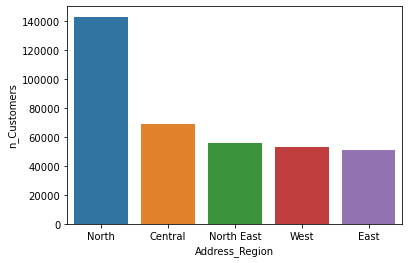

In [16]:
aggData = data['Address_Region'].value_counts() \
                                .reset_index() \
                                .rename({'index': 'Address_Region', 'Address_Region': 'n_Customers'}, axis=1)
ax      = sns.barplot(x="Address_Region", y="n_Customers", data=aggData)

### How many customers were insured last year
Majority of customers were not insured last year

In [17]:
data['Insured_Last_Year'].value_counts()

0    200760
1    170959
Name: Insured_Last_Year, dtype: int64

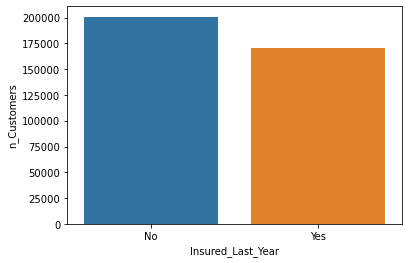

In [18]:
aggData                      = data['Insured_Last_Year'].value_counts() \
                                                        .reset_index() \
                                                        .rename({'index': 'Insured_Last_Year', 
                                                                 'Insured_Last_Year': 'n_Customers'}, axis=1)
aggData['Insured_Last_Year'] = aggData['Insured_Last_Year'].map({0: 'No', 1: 'Yes'})
ax                           = sns.barplot(x="Insured_Last_Year", y="n_Customers", data=aggData)

Only 46% of customers insured last year

In [19]:
aggData['proportion'] = aggData['n_Customers'] / aggData['n_Customers'].sum()
aggData[['Insured_Last_Year', 'proportion']]

,Insured_Last_Year,proportion
0,No,0.540085
1,Yes,0.459915


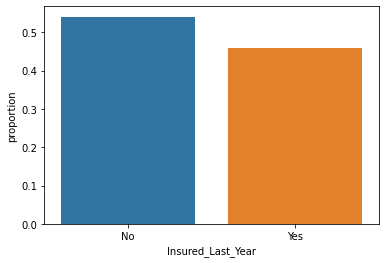

In [20]:
ax  = sns.barplot(x="Insured_Last_Year", y="proportion", data=aggData)

### In terms of vehicle age, we have almost all customers evenly distributed across different ages
However, if we zoom in (truncate the count to minimum 30K), and look more carefully, we can still see some differences in vehicle-age distribution

(30000.0, 32924.85)

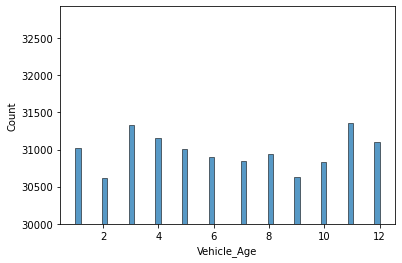

In [21]:
ax = sns.histplot(data=data, x="Vehicle_Age")
ax.set_ylim((30000, None))

### How many customers claimed
We have almost even number of customers made claims before

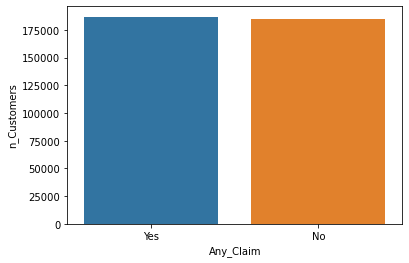

In [22]:
aggData                      = data['Any_Claim'].value_counts() \
                                                .reset_index() \
                                                .rename({'index': 'Any_Claim', 
                                                         'Any_Claim': 'n_Customers'}, axis=1)
ax                           = sns.barplot(x="Any_Claim", y="n_Customers", data=aggData)

### In terms of vehicle engine capacity, we see even distribution
However, if we zoom in (truncate the count to minimum 40K), we can see the difference

(40000.0, 49120.05)

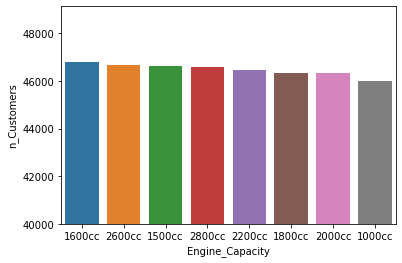

In [23]:
aggData = data['Engine_Capacity'].value_counts() \
                                 .reset_index() \
                                 .rename({'index': 'Engine_Capacity', 'Engine_Capacity': 'n_Customers'}, axis=1)
ax      = sns.barplot(x="Engine_Capacity", y="n_Customers", data=aggData)
ax.set_ylim((40000, None))

(40000.0, 49120.05)

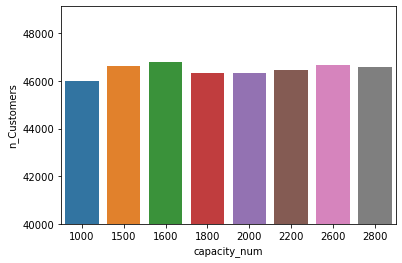

In [24]:
aggData = data['capacity_num'].value_counts() \
                              .reset_index() \
                              .rename({'index': 'capacity_num', 'capacity_num': 'n_Customers'}, axis=1)
ax      = sns.barplot(x="capacity_num", y="n_Customers", order=sorted(aggData['capacity_num'].tolist()), data=aggData)
ax.set_ylim((40000, None))

### In terms of sales channel, majority of the sales come from digital mode: `Email` or `Website`

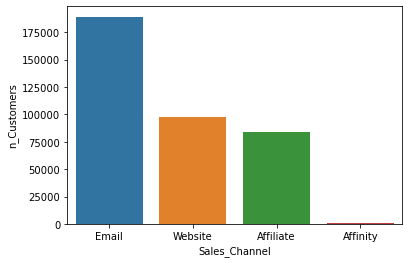

In [25]:
aggData = data['Sales_Channel'].value_counts() \
                               .reset_index() \
                               .rename({'index': 'Sales_Channel', 'Sales_Channel': 'n_Customers'}, axis=1)
ax      = sns.barplot(x="Sales_Channel", y="n_Customers", data=aggData)

### How many customers are willing to renew
Majority of customers do not want to renew their policy

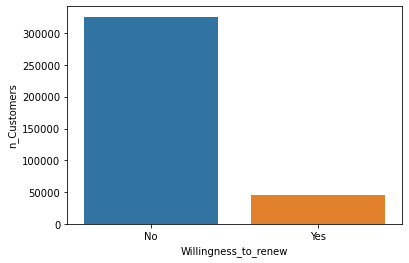

In [26]:
aggData                         = data['Willingness_to_renew'].value_counts() \
                                                              .reset_index() \
                                                              .rename({'index': 'Willingness_to_renew', 
                                                                       'Willingness_to_renew': 'n_Customers'}, axis=1)
aggData['Willingness_to_renew'] = aggData['Willingness_to_renew'].map({0: 'No', 1: 'Yes'})
ax                              = sns.barplot(x="Willingness_to_renew", y="n_Customers", data=aggData)

Only 46% of customers insured last year

In [27]:
aggData['proportion'] = aggData['n_Customers'] / aggData['n_Customers'].sum()
aggData[['Willingness_to_renew', 'proportion']]

,Willingness_to_renew,proportion
0,No,0.876081
1,Yes,0.123919


### Compare customers who were previously insured, and if they are willing to renew

In [28]:
summary                         = pd.pivot_table(data, index='Insured_Last_Year', 
                                                 columns='Willingness_to_renew', values='id', aggfunc=len).reset_index()
summary['Insured_Last_Year']    = summary['Insured_Last_Year'].map({0: 'Insured_LY_No', 1: 'Insured_LY_Yes'})
summary                         = summary.rename({0: 'No willing to renew', 1: 'Willing to renew'}, axis=1)
summary

Willingness_to_renew,Insured_Last_Year,No willing to renew,Willing to renew
0,Insured_LY_No,154854,45906
1,Insured_LY_Yes,170802,157


For the 45,906 customers, it seems weird this group of customers would like to renew? They were not insured with us last year, correct? <br>
Of the 170K+ customers, only 157 is willing to renew with us

In [29]:
### Restricting data to customers who were insured last year, 
### this is to facilitate the subsequent analysis of which factor impact the `willingness to renew`

data_bi                         = data.copy(deep=True)
data_bi                         = data_bi[ data_bi['Insured_Last_Year'] == 1 ]
data_bi['Willingness_to_renew'] = data_bi['Willingness_to_renew'].map({0: 'No', 1: 'Yes'})

### Just looking at customers who were insured with us last year, 
There is no much difference in terms of driving experience, that determine the willingness of renewing

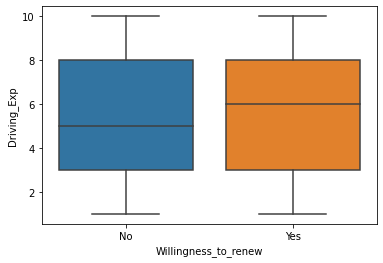

In [30]:
ax = sns.boxplot(x="Willingness_to_renew", y="Driving_Exp", data=data_bi)

### Just looking at customers who were insured with us last year, 
Looking at the boxplot, customers with higher vehicle age are more reluctant to renew with us

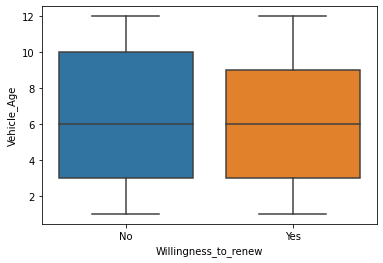

In [31]:
ax = sns.boxplot(x="Willingness_to_renew", y="Vehicle_Age", data=data_bi)

### Just looking at customers who were insured with us last year, 
Looking at the statistics, customers who made claims before, are more willing to renew (~0.9%) vs customers who didn't make claims (0.04%)

Below is absolute counts,

In [32]:
summary                = pd.pivot_table(data_bi, index='Any_Claim',                  
                                        columns='Willingness_to_renew', values='id', aggfunc=len)
summary                = summary.rename({0: 'No willing to renew', 1: 'Willing to renew'}, axis=1)
summary

Willingness_to_renew,No,Yes
Any_Claim,,
No,161364,72
Yes,9438,85


Below is proportion (%),

In [33]:
### calculate proportion, and in percentage unit
(summary.T / summary.sum(axis=1)).T * 100

Willingness_to_renew,No,Yes
Any_Claim,,
No,99.955400,0.044600
Yes,99.107424,0.892576
